In [83]:
import pandas as pd

data = pd.read_csv('../data/train.csv')
# data.describe()
# data.columns
# feature = data['SalePrice']
# data['SalePrice'].describe()
new_data = data
# print new_data

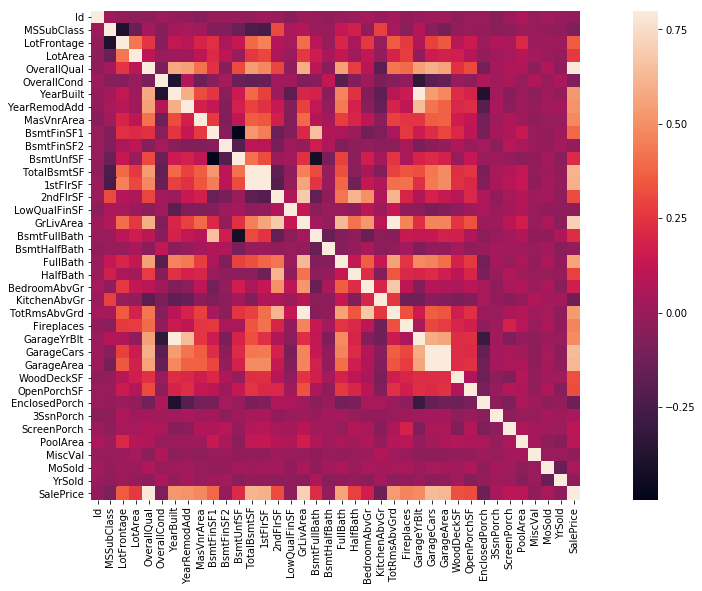

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.matshow(data.corr())

corr = data.corr()
f, ax = plt.subplots(figsize=(19,9))
sns.heatmap(corr,vmax = 0.8,square=True)

In [85]:
data = data.drop(columns=['OverallCond','MSSubClass','KitchenAbvGr','EnclosedPorch','YrSold','BsmtFinSF1'])

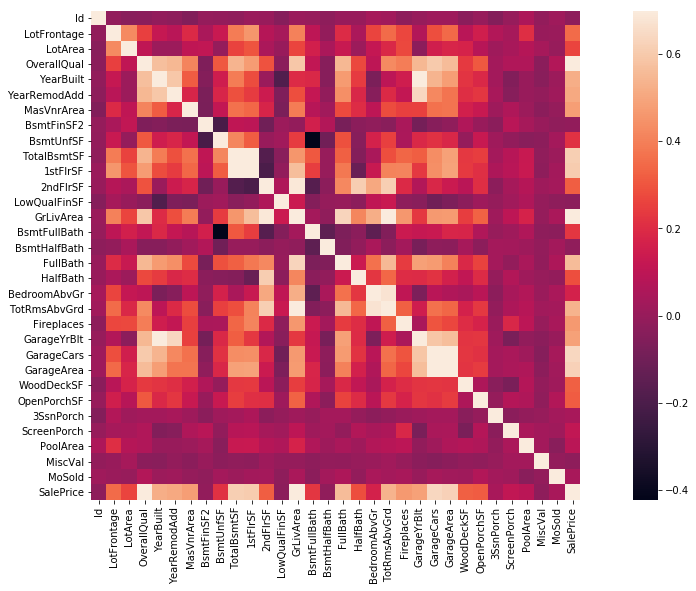

In [86]:
corr = data.corr()
f, ax = plt.subplots(figsize=(19,9))
sns.heatmap(corr,vmax = 0.7,square=True)

In [87]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [88]:
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

def ordinalEncode(data):
    enc = OrdinalEncoder()
    enc.fit(data)
    return enc.transform(data)
X = ordinalEncode(X)
X = X.drop(columns=['GarageYrBlt','LotFrontage','MasVnrArea'])

In [90]:

total = X.isnull().sum().sort_values(ascending=False)
percent = (X.isnull().sum()/X.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)



In [91]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 100)

regr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [96]:
test_data = pd.read_csv('../Data/test.csv')
X_test = test_data.iloc[:,1:-1]
X_test = X_test.drop(columns=['OverallCond','MSSubClass','KitchenAbvGr','EnclosedPorch','YrSold','BsmtFinSF1','GarageYrBlt','LotFrontage','MasVnrArea'])

In [98]:
X_test = ordinalEncode(X_test)

In [102]:
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum()/X_test.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
BsmtFullBath,2,0.001373
BsmtHalfBath,2,0.001373
GarageCars,1,0.000686
BsmtFinSF2,1,0.000686
BsmtUnfSF,1,0.000686
TotalBsmtSF,1,0.000686
GarageArea,1,0.000686
WoodDeckSF,0,0.000000
OpenPorchSF,0,0.000000
3SsnPorch,0,0.000000


In [114]:
X_test.fillna(X_test.mean())

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType
0,11622,5,1961,1961,144.0,270.0,882.0,896,0,0,...,1,1,1,1,1,1,1,1,1,1
1,14267,6,1958,1958,0.0,406.0,1329.0,1329,0,0,...,1,1,1,1,1,1,1,2,2,1
2,13830,5,1997,1998,0.0,137.0,928.0,928,701,0,...,2,1,2,1,1,1,1,1,1,1
3,9978,6,1998,1998,0.0,324.0,926.0,926,678,0,...,3,1,2,1,1,1,1,2,1,1
4,5005,8,1992,1992,0.0,1017.0,1280.0,1280,0,0,...,1,1,3,1,1,1,1,2,1,1
5,10000,6,1993,1994,0.0,763.0,763.0,763,892,0,...,2,1,2,1,1,1,1,2,1,1
6,7980,6,1992,2007,0.0,233.0,1168.0,1187,0,0,...,1,1,2,1,1,1,1,3,3,1
7,8402,6,1998,1998,0.0,789.0,789.0,789,676,0,...,3,1,2,1,1,1,1,2,1,1
8,10176,7,1990,1990,0.0,663.0,1300.0,1341,0,0,...,4,1,1,1,1,1,1,2,1,1
9,8400,4,1970,1970,78.0,0.0,882.0,882,0,0,...,1,1,2,1,1,1,1,1,1,1


In [110]:
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum()/X_test.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
BsmtFullBath,2,0.001373
BsmtHalfBath,2,0.001373
GarageCars,1,0.000686
BsmtFinSF2,1,0.000686
BsmtUnfSF,1,0.000686
TotalBsmtSF,1,0.000686
GarageArea,1,0.000686
WoodDeckSF,0,0.000000
OpenPorchSF,0,0.000000
3SsnPorch,0,0.000000


In [109]:
test_output = regr.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').